# **Classification**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5'

## Load Data

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("outputs/datasets/cleaned/phnx_2015_2025.csv")
print(df.shape)
df.head(3)

(2524, 18)


,date,open,high,low,close,volume,pre_open,pre_high,pre_low,pre_close,pre_vol,pre_open_2,pre_high_2,pre_low_2,pre_close_2,pre_vol_2,average,target
0,2015-01-06 00:00:00+00:00,616.130008,616.130008,597.447815,597.447815,781658,624.517926,628.330604,611.204044,612.317383,416491.0,629.093225,630.999564,621.269605,624.899231,385199.0,606.788911,0
1,2015-01-07 00:00:00+00:00,603.548219,605.812932,598.286709,604.310791,743617,616.130008,616.130008,597.447815,597.447815,781658.0,624.517926,628.330604,611.204044,612.317383,416491.0,603.929505,1
2,2015-01-08 00:00:00+00:00,607.742163,612.317413,605.454508,611.936157,453541,603.548219,605.812932,598.286709,604.310791,743617.0,616.130008,616.130008,597.447815,597.447815,781658.0,609.839160,1


In [5]:
# df['date'] = pd.to_datetime(df['date'],utc=True)
df = df.drop(['date'],axis=1)

# Section 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2524 non-null   float64
 1   high         2524 non-null   float64
 2   low          2524 non-null   float64
 3   close        2524 non-null   float64
 4   volume       2524 non-null   int64  
 5   pre_open     2524 non-null   float64
 6   pre_high     2524 non-null   float64
 7   pre_low      2524 non-null   float64
 8   pre_close    2524 non-null   float64
 9   pre_vol      2524 non-null   float64
 10  pre_open_2   2524 non-null   float64
 11  pre_high_2   2524 non-null   float64
 12  pre_low_2    2524 non-null   float64
 13  pre_close_2  2524 non-null   float64
 14  pre_vol_2    2524 non-null   float64
 15  average      2524 non-null   float64
 16  target       2524 non-null   int64  
dtypes: float64(15), int64(2)
memory usage: 335.3 KB


Section 1 content

In [7]:
feature_names = df.columns.tolist()[1:6]
feature_names

['high', 'low', 'close', 'volume', 'pre_open']

## ML Pipeline with all Data

In [8]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.encoding import OrdinalEncoder


def PipelineDataCleaningAndFeatureEngineering():
    pipeline_base = Pipeline([
        # ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
        #                                              variables=['date'])),
        ("OutlierWinsorizer", Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['open', 'high', 'low', 'close', 'volume'])),
        ("YeoJohnsonNumericalTransformer", vt.YeoJohnsonTransformer(variables=['open', 'high', 'low', 'close', 'volume'])),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

    ])

    return pipeline_base


PipelineDataCleaningAndFeatureEngineering()

Pipeline(steps=[('OutlierWinsorizer',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['open', 'high', 'low', 'close',
                                       'volume'])),
                ('YeoJohnsonNumericalTransformer',
                 YeoJohnsonTransformer(variables=['open', 'high', 'low',
                                                  'close', 'volume'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6))])

In [9]:
# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


def PipelineClf(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        ("feat_selection", SelectFromModel(model)),
        ("model", model),
    ])

    return pipeline_base

In [10]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")

            model = PipelineClf(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, )
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        return df[columns], self.grid_searches

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1),
    df['target'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2019, 16) (2019,) (505, 16) (505,)


## Target Imbalance

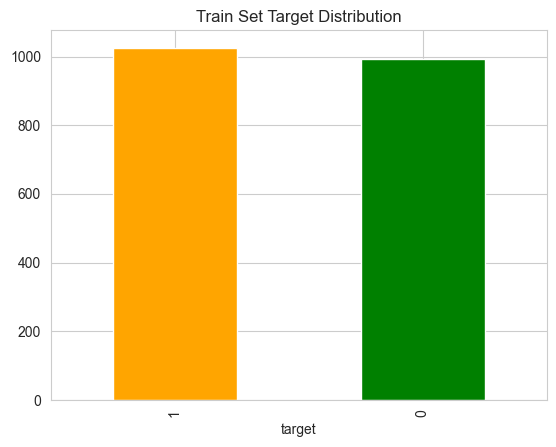

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
y_train.value_counts().plot(kind='bar', color=['orange', 'green'], title='Train Set Target Distribution')
plt.show()

## Grid Search CV - Sklearn

In [13]:
models_quick_search = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "XGBClassifier": XGBClassifier(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
}

# empyt dictionary means the default hyperparameters will be used
params_quick_search = {
    "LogisticRegression": {},
    "XGBClassifier": {},
    "DecisionTreeClassifier": {},
    "RandomForestClassifier": {},
    "GradientBoostingClassifier": {},
    "ExtraTreesClassifier": {},
    "AdaBoostClassifier": {},
}

In [14]:
from sklearn.metrics import make_scorer, recall_score
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, pos_label=1),
           n_jobs=-1, cv=5)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\ajv10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(



Running GridSearchCV for DecisionTreeClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [15]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary 

,estimator,min_score,mean_score,max_score,std_score
0,LogisticRegression,0.687805,0.723902,0.77561,0.030007
4,GradientBoostingClassifier,0.634146,0.652683,0.682927,0.016441
5,ExtraTreesClassifier,0.55122,0.645854,0.721951,0.064612
6,AdaBoostClassifier,0.468293,0.634146,0.785366,0.114899
3,RandomForestClassifier,0.541463,0.605854,0.663415,0.042234
2,DecisionTreeClassifier,0.536585,0.587317,0.682927,0.052593
1,XGBClassifier,NaN,NaN,NaN,NaN


---

# Section 2

Section 2 content

In [16]:
models_search = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
}

# Documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# We will not conduct an extensive search, since the focus
# is on how to combine all knowledge in an applied project.
# In a workplace project, you may spend more time in this step
params_search = {
    "LogisticRegression": [
        {
            'model__penalty': ['l1'],
            'model__solver': ['liblinear'],
            'model__C': [100, 10, 1.0, 0.1, 0.01],
            'model__max_iter': [100, 200, 300, 400],
            'model__tol': [1e-4, 1e-5, 1e-6, 1e-7],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False],  
        },
        {
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
            'model__C': [100, 10, 1.0, 0.1, 0.01],
            'model__max_iter': [100, 200, 300, 400],
            'model__tol': [1e-4, 1e-5, 1e-6, 1e-7],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False],
            # 'model__warm_start': [True, False],   
        },
        {
            'model__penalty': [None],
            'model__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'model__C': [100, 10, 1.0, 0.1, 0.01],
            'model__max_iter': [100, 200, 300, 400],
            'model__tol': [1e-4, 1e-5, 1e-6, 1e-7],
            'model__class_weight': [None, 'balanced'],
            'model__fit_intercept': [True, False], 
        },],
        "GradientBoostingClassifier": {
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__n_estimators': [50, 100, 150, 200],
        'model__subsample': [0.7, 0.8, 0.9],
        'model__min_samples_split': [2, 3, 5],
        'model__min_samples_leaf': [1, 2, 3],
        'model__max_depth': [3, 4, 5],
    }
}

In [17]:
from sklearn.metrics import recall_score, make_scorer
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring =  make_scorer(recall_score, pos_label=1),
           n_jobs=-1, cv=5, verbose=2)


Running GridSearchCV for LogisticRegression 

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


In [18]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__C,model__class_weight,model__fit_intercept,model__max_iter,model__penalty,model__solver,model__tol,model__learning_rate,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__n_estimators,model__subsample
1360,LogisticRegression,0.921951,0.953171,0.97561,0.019168,0.01,None,True,200,l2,lbfgs,0.0001,NaN,NaN,NaN,NaN,NaN,NaN
1380,LogisticRegression,0.921951,0.953171,0.97561,0.019168,0.01,None,True,300,l2,newton-cg,0.0001,NaN,NaN,NaN,NaN,NaN,NaN
1387,LogisticRegression,0.921951,0.953171,0.97561,0.019168,0.01,None,True,300,l2,sag,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1386,LogisticRegression,0.921951,0.953171,0.97561,0.019168,0.01,None,True,300,l2,sag,0.000001,NaN,NaN,NaN,NaN,NaN,NaN
1385,LogisticRegression,0.921951,0.953171,0.97561,0.019168,0.01,None,True,300,l2,sag,0.00001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,LogisticRegression,0.0,0.0,0.0,0.0,0.01,None,False,200,l1,liblinear,0.00001,NaN,NaN,NaN,NaN,NaN,NaN
292,LogisticRegression,0.0,0.0,0.0,0.0,0.01,balanced,True,200,l1,liblinear,0.0001,NaN,NaN,NaN,NaN,NaN,NaN
276,LogisticRegression,0.0,0.0,0.0,0.0,0.01,None,False,200,l1,liblinear,0.0001,NaN,NaN,NaN,NaN,NaN,NaN
266,LogisticRegression,0.0,0.0,0.0,0.0,0.01,None,True,300,l1,liblinear,0.000001,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
best_model = grid_search_summary.iloc[0,0]
best_model

'LogisticRegression'

In [20]:
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__C': 0.01,
 'model__class_weight': None,
 'model__fit_intercept': True,
 'model__max_iter': 100,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs',
 'model__tol': 0.0001}

In [21]:
pipeline_clf = grid_search_pipelines[best_model].best_estimator_
pipeline_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=0))),
                ('model', LogisticRegression(C=0.01, random_state=0))])

In [22]:
X_train.head(3)

,open,high,low,close,volume,pre_open,pre_high,pre_low,pre_close,pre_vol,pre_open_2,pre_high_2,pre_low_2,pre_close_2,pre_vol_2,average
194,628.906520,632.644103,625.473975,628.525085,382846,628.525235,638.822628,628.525235,630.813599,507115.0,630.050676,632.720413,623.567081,628.906555,376258.0,628.715803
189,630.050740,635.771588,628.525185,634.246033,398329,630.050708,630.050708,620.516002,623.948486,355145.0,623.185739,630.050708,622.041557,623.948486,546269.0,632.148386
713,673.760889,679.592424,671.966636,678.246704,583454,681.835163,684.975197,676.210054,678.695251,497156.0,667.929442,681.386704,667.929442,680.938171,856953.0,676.003796


In [23]:
# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': X_train.columns[pipeline_clf['feat_selection'].get_support()],
    'Importance': pipeline_clf['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)

# re-assign best_features order
best_features = df_feature_importance['Feature'].to_list()

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [24]:
from sklearn.metrics import classification_report, confusion_matrix


def confusion_matrix_and_report(X, y, pipeline, label_map):

    prediction = pipeline.predict(X)

    print('---  Confusion Matrix  ---')
    print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
          columns=[["Actual " + sub for sub in label_map]],
          index=[["Prediction " + sub for sub in label_map]]
          ))
    print("\n")

    print('---  Classification Report  ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [25]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline_clf,
                label_map= ['0', '1'] 
                )

#### Train Set #### 

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0      220       39
Prediction 1      774      986


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.85      0.22      0.35       994
           1       0.56      0.96      0.71      1025

    accuracy                           0.60      2019
   macro avg       0.70      0.59      0.53      2019
weighted avg       0.70      0.60      0.53      2019
 

#### Test Set ####

---  Confusion Matrix  ---
             Actual 0 Actual 1
Prediction 0       46       11
Prediction 1      193      255


---  Classification Report  ---
              precision    recall  f1-score   support

           0       0.81      0.19      0.31       239
           1       0.57      0.96      0.71       266

    accuracy                           0.60       505
   macro avg       0.69      0.58      0.51       505
weighted avg       0.68      0.60      0.52      

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
try:
  # create here your folder
  os.makedirs(name='')
except Exception as e:
  print(e)
